In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
monkeypox_data = pd.read_csv("Worldwide_Case_Detection_Timeline.csv")
monkeypox_data

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
1,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
2,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
3,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
4,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
...,...,...,...,...,...,...,...,...,...
2544,2022-06-17,Germany,NaN,NaN,male,NaN,NaN,NaN,NaN
2545,2022-06-17,Germany,NaN,NaN,male,NaN,NaN,NaN,NaN
2546,2022-06-17,Germany,NaN,NaN,male,NaN,NaN,NaN,NaN
2547,2022-06-17,Germany,NaN,NaN,male,NaN,NaN,NaN,NaN


In [3]:
monkeypox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        2549 non-null   object
 1   Country                  2549 non-null   object
 2   City                     419 non-null    object
 3   Age                      663 non-null    object
 4   Gender                   646 non-null    object
 5   Symptoms                 104 non-null    object
 6   Hospitalised (Y/N/NA)    142 non-null    object
 7   Isolated (Y/N/NA)        155 non-null    object
 8   Travel_history (Y/N/NA)  141 non-null    object
dtypes: object(9)
memory usage: 179.4+ KB


In [4]:
monkeypox_data.nunique()

Date_confirmation          34
Country                    42
City                       90
Age                        27
Gender                      3
Symptoms                   28
Hospitalised (Y/N/NA)       2
Isolated (Y/N/NA)           1
Travel_history (Y/N/NA)     2
dtype: int64

In [5]:
monkeypox_data.isnull().sum()

Date_confirmation             0
Country                       0
City                       2130
Age                        1886
Gender                     1903
Symptoms                   2445
Hospitalised (Y/N/NA)      2407
Isolated (Y/N/NA)          2394
Travel_history (Y/N/NA)    2408
dtype: int64

In [6]:
monkeypox_data['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions', nan,
       'ulcerative lesions',
       'Slight swallowing difficulties and an elevated temperature',
       'perianal papules; inguinal adenopathy', 'lesions',
       'genital ulcers', 'genital rash', 'fever, rash', 'fever, lesions',
       'fever, cough, skin lesions', 'skin lesions',
       'oral and genital ulcers, fever', 'blisters',
       'blisters, high fever', 'pustules, fever',
       'fever, muscle pain, rash', 'genital ulcer lesions',
       'Fever, chills, fatigue, headache, skin lesions',
       'Fever, skin rashes',
       'cough, chills, muscle pain, pustule-like lesions',
       'fever; myalgia', 'skin lesions, fever',
       'headache, muscle pain, back pain, vasicular rashes',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'rash on the skin',
       'Spots on skin, vesicuated lesions, skin scabs'], dtype=object)

In [7]:
monkeypox_data['Symptoms'].value_counts()

genital ulcer lesions                                         30
oral and genital ulcers, fever                                17
ulcerative lesions                                            16
skin lesions, ulcerative lesions                               5
vesicular rash                                                 5
genital ulcers                                                 5
skin lesions                                                   3
rash on the skin                                               2
rash                                                           2
Spots on skin, vesicuated lesions, skin scabs                  1
skin lesions, fever                                            1
skin lesions, headaches, enlarged lymph nodes, fever           1
pustules, fever                                                1
cough, chills, muscle pain, pustule-like lesions               1
Slight swallowing difficulties and an elevated temperature     1
headache, muscle pain, ba

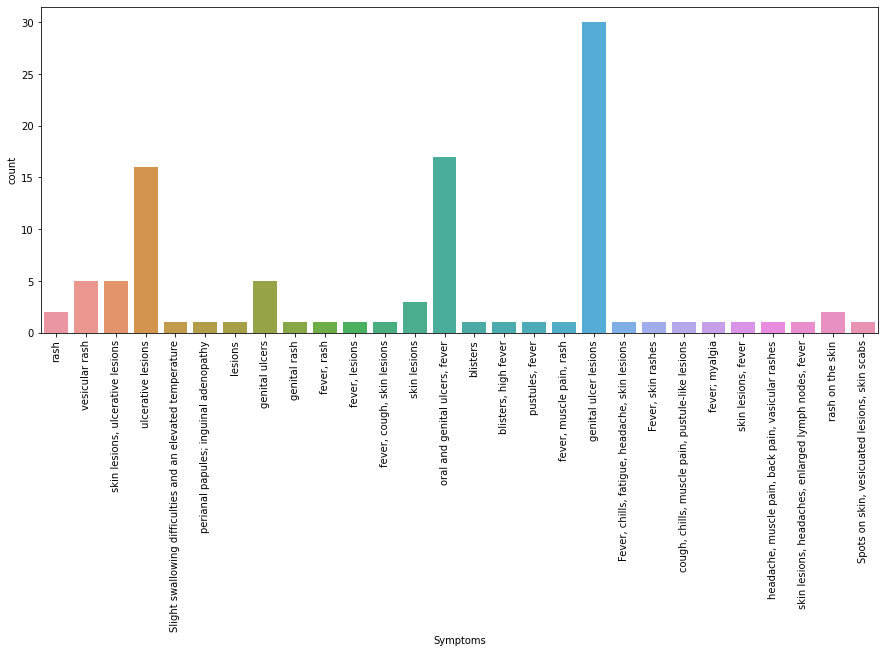

In [15]:
plt.figure(figsize=(15,6))
sns.countplot('Symptoms', data = monkeypox_data)
plt.xticks(rotation = 90)
plt.show()


In [10]:
monkeypox_data['Hospitalised (Y/N/NA)'].unique()

array(['Y', 'N', nan], dtype=object)

In [11]:
monkeypox_data['Hospitalised (Y/N/NA)'].value_counts()

N    77
Y    65
Name: Hospitalised (Y/N/NA), dtype: int64

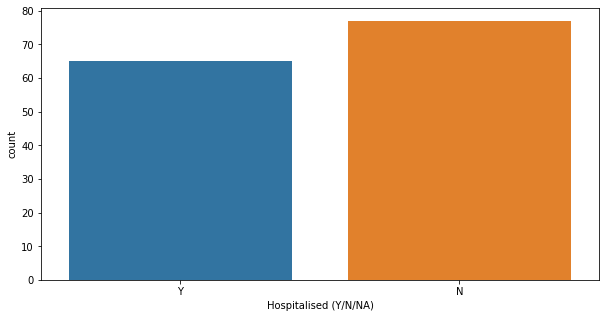

In [14]:
plt.figure(figsize=(10,5))
sns.countplot('Hospitalised (Y/N/NA)', data = monkeypox_data)
plt.show()


In [17]:
monkeypox_data['Travel_history (Y/N/NA)'].unique()

array(['Y', 'N', nan], dtype=object)

In [18]:
monkeypox_data['Travel_history (Y/N/NA)'].value_counts()

Y    91
N    50
Name: Travel_history (Y/N/NA), dtype: int64

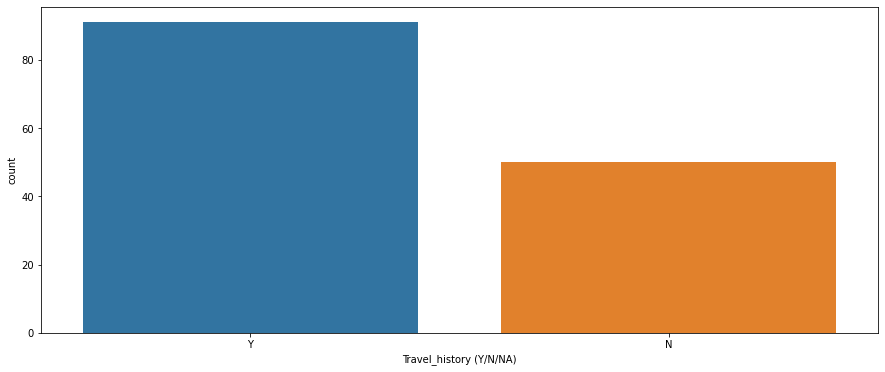

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('Travel_history (Y/N/NA)', data = monkeypox_data)
plt.show()

In [23]:
monkeypox_data_cases = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv")
monkeypox_data_cases

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,550.0,0.0,5.0,2.0,7.0
1,Portugal,276.0,0.0,0.0,0.0,34.0
2,Spain,497.0,32.0,11.0,2.0,0.0
3,United States,113.0,0.0,4.0,18.0,1.0
4,Canada,167.0,37.0,1.0,1.0,0.0
...,...,...,...,...,...,...
62,Georgia,1.0,0.0,0.0,0.0,0.0
63,Slovakia,0.0,1.0,1.0,1.0,0.0
64,Luxembourg,1.0,0.0,0.0,0.0,0.0
65,Nepal,0.0,1.0,1.0,1.0,0.0


In [24]:
monkeypox_data_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             67 non-null     object 
 1   Confirmed_Cases     67 non-null     float64
 2   Suspected_Cases     67 non-null     float64
 3   Hospitalized        67 non-null     float64
 4   Travel_History_Yes  67 non-null     float64
 5   Travel_History_No   67 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.3+ KB


In [25]:
monkeypox_data_cases.isnull().sum()

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [26]:
monkeypox_data_cases.nunique()

Country               67
Confirmed_Cases       26
Suspected_Cases        8
Hospitalized           8
Travel_History_Yes    10
Travel_History_No      6
dtype: int64

In [27]:
monkeypox_data_cases['Country'].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile'], dtype=object)

In [28]:
monkeypox_data_cases[monkeypox_data_cases['Country']=='India']

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
53,India,0.0,0.0,0.0,0.0,0.0


### There are no reported cases of monkeypox virus in India till date as on 17th June,2022

In [82]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], height=800,width=1200, color_continuous_scale="ylorbr")
    fig.show()    

tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd']

In [83]:
plot_map(monkeypox_data_cases,'Confirmed_Cases')

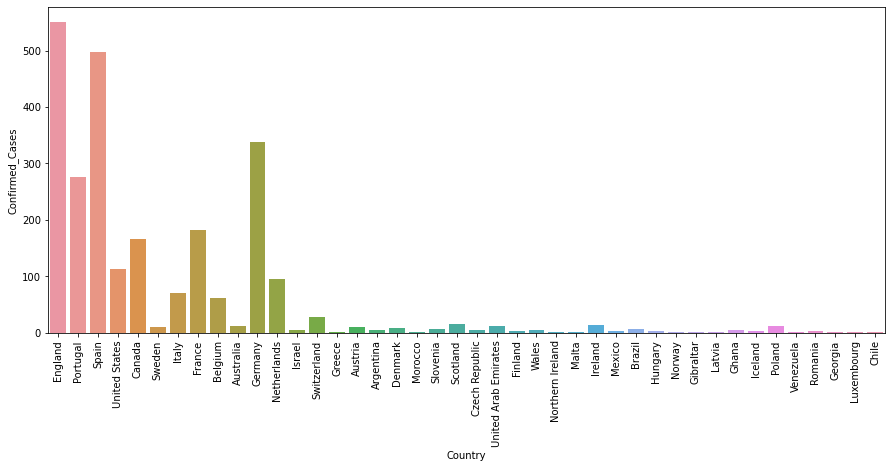

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Country', y = 'Confirmed_Cases',data = monkeypox_data_cases[monkeypox_data_cases['Confirmed_Cases']>0])
plt.xticks(rotation = 90)
plt.show()

### Most cases scene in ENGLAND, SPAIN, GERMANY i.e. it's spreading with a great extent in EUROPE

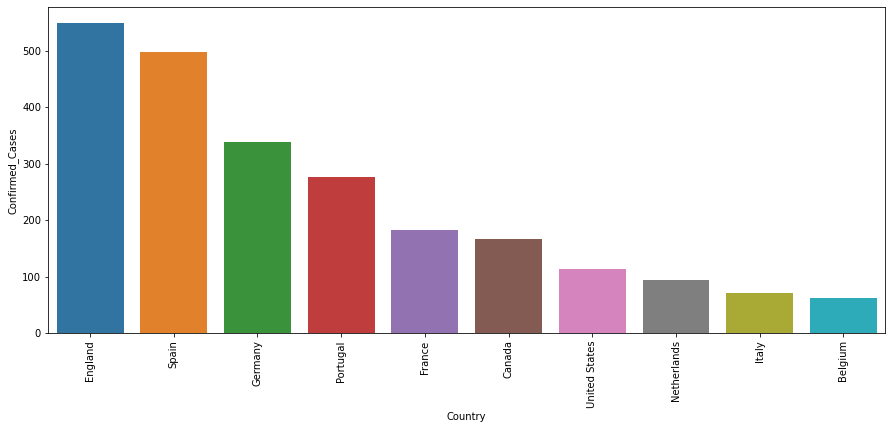

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Country', y = 'Confirmed_Cases',data = monkeypox_data_cases.nlargest(10, 'Confirmed_Cases'))
plt.xticks(rotation = 90)
plt.show()

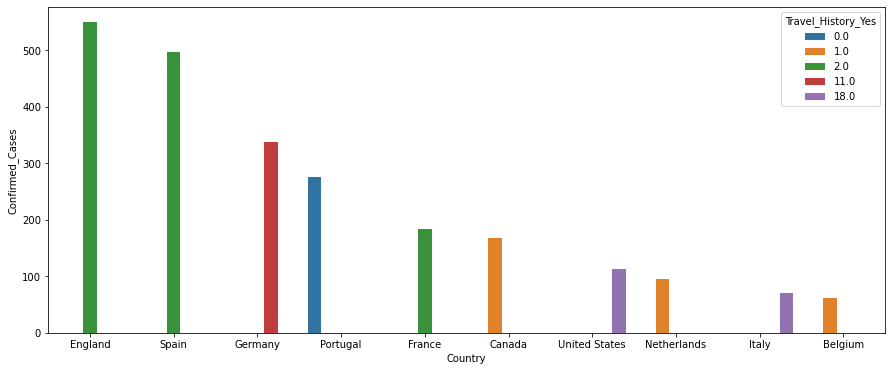

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Country', y = 'Confirmed_Cases', hue = 'Travel_History_Yes', data = monkeypox_data_cases.nlargest(10, 'Confirmed_Cases'))
plt.show()

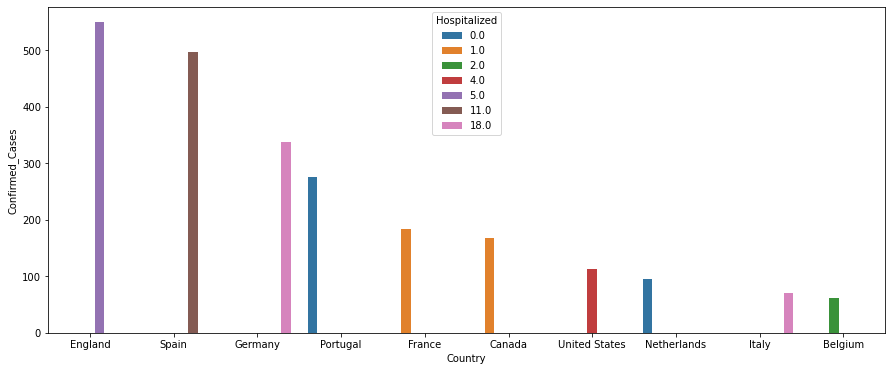

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Country', y = 'Confirmed_Cases', hue = 'Hospitalized', data = monkeypox_data_cases.nlargest(10, 'Confirmed_Cases'))
plt.show()

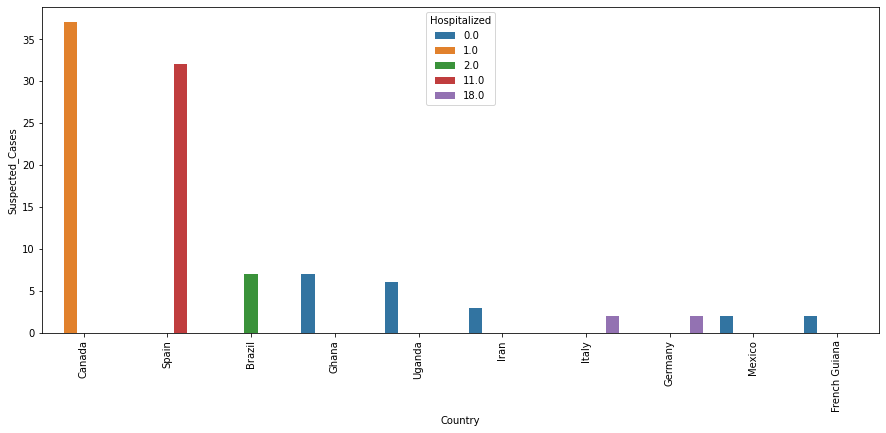

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Country', y = 'Suspected_Cases', hue = 'Hospitalized', data = monkeypox_data_cases.nlargest(10, 'Suspected_Cases'))
plt.xticks(rotation = 90)
plt.show()

In [42]:
monkeypox_daily_cases = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')
monkeypox_daily_cases

,Country,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,...,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17
0,England,1,1,1,4,0,2,0,11,0,...,0,43,0,0,104,0,52,0,46,0
1,Portugal,0,0,0,0,3,11,9,0,0,...,25,18,0,0,0,0,22,10,0,35
2,Spain,0,0,0,0,0,7,0,23,10,...,34,0,16,0,0,0,38,0,184,0
3,United States,0,0,0,0,0,1,0,1,0,...,5,5,2,2,0,16,7,12,16,13
4,Germany,0,0,0,0,0,0,1,1,2,...,13,30,12,0,1,25,14,45,24,67
5,Belgium,0,0,0,0,0,0,1,2,1,...,8,0,0,0,0,0,0,27,0,10
6,Sweden,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,4,0,0
7,Italy,0,0,0,0,0,0,1,2,0,...,2,0,1,5,0,0,1,10,0,23
8,Canada,0,0,0,0,0,0,2,3,0,...,1,11,3,0,0,8,34,0,9,0
9,France,0,0,0,0,0,0,1,0,0,...,0,25,0,0,0,0,34,0,58,0


In [43]:
monkeypox_daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     42 non-null     object
 1   2022-05-06  42 non-null     int64 
 2   2022-05-12  42 non-null     int64 
 3   2022-05-13  42 non-null     int64 
 4   2022-05-15  42 non-null     int64 
 5   2022-05-17  42 non-null     int64 
 6   2022-05-18  42 non-null     int64 
 7   2022-05-19  42 non-null     int64 
 8   2022-05-20  42 non-null     int64 
 9   2022-05-21  42 non-null     int64 
 10  2022-05-23  42 non-null     int64 
 11  2022-05-24  42 non-null     int64 
 12  2022-05-25  42 non-null     int64 
 13  2022-05-26  42 non-null     int64 
 14  2022-05-27  42 non-null     int64 
 15  2022-05-28  42 non-null     int64 
 16  2022-05-29  42 non-null     int64 
 17  2022-05-30  42 non-null     int64 
 18  2022-05-31  42 non-null     int64 
 19  2022-06-01  42 non-null     int64 
 20  2022-06-02  

In [44]:
monkeypox_daily_cases.describe()

,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-23,...,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.023810,0.023810,0.023810,0.095238,0.071429,0.500000,0.380952,1.095238,0.380952,1.738095,...,2.309524,3.476190,1.000000,0.214286,2.547619,1.380952,5.404762,3.547619,8.690476,3.738095
std,0.154303,0.154303,0.154303,0.617213,0.462910,2.003046,1.430545,3.900028,1.576541,6.036715,...,6.719060,9.082919,3.068328,0.842057,16.038372,4.674541,12.464700,8.317488,30.176302,12.073069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,...,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,3.000000,11.000000,9.000000,23.000000,10.000000,36.000000,...,34.000000,43.000000,16.000000,5.000000,104.000000,25.000000,52.000000,45.000000,184.000000,67.000000


In [45]:
monkeypox_daily_cases.isnull().sum()

Country       0
2022-05-06    0
2022-05-12    0
2022-05-13    0
2022-05-15    0
2022-05-17    0
2022-05-18    0
2022-05-19    0
2022-05-20    0
2022-05-21    0
2022-05-23    0
2022-05-24    0
2022-05-25    0
2022-05-26    0
2022-05-27    0
2022-05-28    0
2022-05-29    0
2022-05-30    0
2022-05-31    0
2022-06-01    0
2022-06-02    0
2022-06-03    0
2022-06-04    0
2022-06-06    0
2022-06-07    0
2022-06-08    0
2022-06-09    0
2022-06-10    0
2022-06-11    0
2022-06-12    0
2022-06-13    0
2022-06-14    0
2022-06-15    0
2022-06-16    0
2022-06-17    0
dtype: int64

In [46]:
monkeypox_daily_cases.nunique()

Country       42
2022-05-06     2
2022-05-12     2
2022-05-13     2
2022-05-15     2
2022-05-17     2
2022-05-18     5
2022-05-19     4
2022-05-20     6
2022-05-21     4
2022-05-23     7
2022-05-24     6
2022-05-25     8
2022-05-26    10
2022-05-27     7
2022-05-28     4
2022-05-29     5
2022-05-30     7
2022-05-31     8
2022-06-01     8
2022-06-02    10
2022-06-03     9
2022-06-04     3
2022-06-06     8
2022-06-07    10
2022-06-08     8
2022-06-09    10
2022-06-10     6
2022-06-11     4
2022-06-12     3
2022-06-13     7
2022-06-14    10
2022-06-15    12
2022-06-16    12
2022-06-17     8
dtype: int64

In [48]:
monkeypox_daily_cases['2022-05-26'].unique()

array([24,  9, 25,  5,  2,  0,  3, 11,  1,  4], dtype=int64)

In [49]:
monkeypox_daily_cases['2022-06-07'].unique()

array([18, 13, 27,  6,  0,  1, 20, 14,  2,  5], dtype=int64)

In [50]:
monkeypox_daily_cases['2022-06-14'].unique()

array([52, 22, 38,  7, 14,  0,  1, 34, 20,  2], dtype=int64)

In [51]:
monkeypox_daily_cases['2022-06-15'].unique()

array([ 0, 10, 12, 45, 27,  4,  1,  8,  5,  2, 11,  3], dtype=int64)

In [52]:
monkeypox_daily_cases['2022-06-16'].unique()

array([ 46,   0, 184,  16,  24,   9,  58,   1,  15,   4,   3,   2],
      dtype=int64)

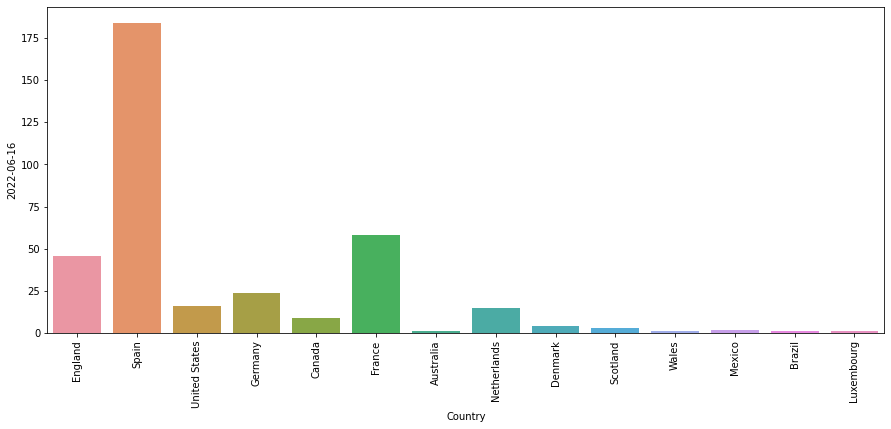

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(y = '2022-06-16', x = 'Country', data = monkeypox_daily_cases[monkeypox_daily_cases['2022-06-16']>0])
plt.xticks(rotation = 90)
plt.show()

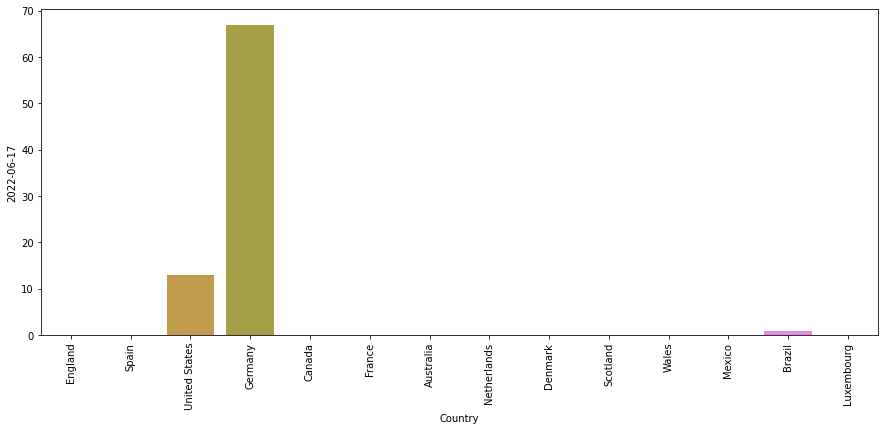

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(y = '2022-06-17', x = 'Country', data = monkeypox_daily_cases[monkeypox_daily_cases['2022-06-16']>0])
plt.xticks(rotation = 90)
plt.show()

### Till date 16th June,2022, the spread of monkeypox is seen in the European countries with a very high rate; SPAIN being the most affected country.